Installation and Setup

In [ ]:
# Installing TensorFlow
! pip install -q tensorflow-gpu

     |████████████████████████████████| 497.5 MB 24 kB/s 
     |████████████████████████████████| 462 kB 52.2 MB/s 


In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
training_data = pd.read_excel('/content/drive/MyDrive/Google stock price/DLproj_training.xlsx')

In [ ]:
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-01,828.849976,836.255005,827.260010,835.239990,835.239990,1496500
1,2017-03-02,833.849976,834.510010,829.640015,830.630005,830.630005,942500
2,2017-03-03,830.559998,831.359985,825.750977,829.080017,829.080017,896400
3,2017-03-06,826.950012,828.880005,822.400024,827.780029,827.780029,1109000
4,2017-03-07,827.400024,833.409973,826.520020,831.909973,831.909973,1037600


In [ ]:
training_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1276,2022-03-24,2785.449951,2827.929932,2760.788086,2826.239990,2826.239990,1027200
1277,2022-03-25,2835.080078,2839.189941,2793.989990,2830.429932,2830.429932,963500
1278,2022-03-28,2813.689941,2839.530029,2796.562988,2839.000000,2839.000000,1188700
1279,2022-03-29,2863.209961,2883.250000,2849.679932,2865.000000,2865.000000,1433900
1280,2022-03-30,2857.399902,2869.610107,2843.360107,2852.889893,2852.889893,1052300


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1281 non-null   datetime64[ns]
 1   Open       1281 non-null   float64       
 2   High       1281 non-null   float64       
 3   Low        1281 non-null   float64       
 4   Close      1281 non-null   float64       
 5   Adj Close  1281 non-null   float64       
 6   Volume     1281 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 70.2 KB


In [ ]:
training_set = training_data.iloc[:, 1:2].values

In [ ]:
training_set.shape, training_data.shape

((1281, 1), (1281, 7))

In [ ]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.0098192 ],
       [0.01206103],
       [0.01058592],
       ...,
       [0.89975426],
       [0.92195736],
       [0.91935233]])

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []

for i in range(90, 1281):
  x_train.append(training_set_scaled[i-90:i, 0])
  y_train.append(training_set_scaled[i, 0])

# converting x_train and y_train into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train

array([[0.0098192 , 0.01206103, 0.01058592, ..., 0.04250959, 0.04356773,
        0.04568849],
       [0.01206103, 0.01058592, 0.00896732, ..., 0.04356773, 0.04568849,
        0.05148141],
       [0.01058592, 0.00896732, 0.00916909, ..., 0.04568849, 0.05148141,
        0.05496519],
       ...,
       [0.97585095, 0.97637561, 0.97563126, ..., 0.88589081, 0.8870924 ,
        0.90934487],
       [0.97637561, 0.97563126, 0.99225671, ..., 0.8870924 , 0.90934487,
        0.89975426],
       [0.97563126, 0.99225671, 0.98456049, ..., 0.90934487, 0.89975426,
        0.92195736]])

In [ ]:
y_train

array([0.05148141, 0.05496519, 0.05906326, ..., 0.89975426, 0.92195736,
       0.91935233])

In [ ]:
x_train.shape

(1191, 90)

In [ ]:
# reshaping dataset
x_train = x_train.reshape(1191, 90, 1)

In [ ]:
x_train.shape

(1191, 90, 1)

Building LSTM

In [ ]:
# define an object (inilitizing RNN)
model = tf.keras.models.Sequential()

In [ ]:
# first LSTM layer
model.add(tf.keras.layers.LSTM(units=90, activation='relu', return_sequences=True, input_shape=(90,1)))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# second LSTM layer
model.add(tf.keras.layers.LSTM(units=90, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# third LSTM layer
model.add(tf.keras.layers.LSTM(units=110, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# fourth LSTM layer
model.add(tf.keras.layers.LSTM(units=130, activation='relu'))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
# output layer
model.add(tf.keras.layers.Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 90, 90)            33120     
                                                                 
 dropout_4 (Dropout)         (None, 90, 90)            0         
                                                                 
 lstm_6 (LSTM)               (None, 90, 90)            65160     
                                                                 
 dropout_5 (Dropout)         (None, 90, 90)            0         
                                                                 
 lstm_7 (LSTM)               (None, 90, 110)           88440     
                                                                 
 dropout_6 (Dropout)         (None, 90, 110)           0         
                                                                 
 lstm_8 (LSTM)               (None, 130)              

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Training the model

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
38/38 [==============================] - 17s 430ms/step - loss: 0.0014
Epoch 2/100
38/38 [==============================] - 15s 384ms/step - loss: 0.0015
Epoch 3/100
38/38 [==============================] - 15s 383ms/step - loss: 0.0017
Epoch 4/100
38/38 [==============================] - 15s 392ms/step - loss: 0.0026
Epoch 5/100
38/38 [==============================] - 15s 387ms/step - loss: 0.0018
Epoch 6/100
38/38 [==============================] - 15s 384ms/step - loss: 0.0021
Epoch 7/100
38/38 [==============================] - 15s 381ms/step - loss: 0.0018
Epoch 8/100
38/38 [==============================] - 17s 452ms/step - loss: 0.0020
Epoch 9/100
38/38 [==============================] - 15s 388ms/step - loss: 0.0015
Epoch 10/100
38/38 [==============================] - 15s 390ms/step - loss: 0.0017
Epoch 11/100
38/38 [==============================] - 15s 393ms/step - loss: 0.0014
Epoch 12/100
38/38 [==============================] - 15s 390ms/step - loss: 0.0013
E

Making Predictions

In [ ]:
# getting the real stock prices of month Nov 2019
test_data = pd.read_excel('/content/drive/MyDrive/Google stock price/DLproj_testing.xlsx')

In [ ]:

test_data.shape

(20, 7)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       20 non-null     datetime64[ns]
 1   Open       20 non-null     float64       
 2   High       20 non-null     float64       
 3   Low        20 non-null     float64       
 4   Close      20 non-null     float64       
 5   Adj Close  20 non-null     float64       
 6   Volume     20 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.2 KB


In [ ]:
real_stock_price = test_data.iloc[:, 1:2].values

In [ ]:
real_stock_price.shape

(20, 1)

In [ ]:
# Getting predicted stock prices of month Nov 2019

# concatination
dataset_total = pd.concat((training_data['Open'], test_data['Open']), axis = 0)

# stock prices of previous 60 days for each day of Nov 2019
inputs = dataset_total[len(dataset_total) - len(test_data) - 90:].values

# reshape (convert into numpy array)
inputs = inputs.reshape(-1,1)

# feature scaling
inputs = sc.transform(inputs)

# creating a test set

x_test = []
for i in range(90, 110):
  x_test.append(inputs[i-90:i, 0])

# convert in numpy array
x_test = np.array(x_test)

# convert in 3D (required to process)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# getting predicted stock prices
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
print(predicted_stock_price[5]), print(real_stock_price[5])

[2734.8596]
[2725.]


(None, None)

Visualization

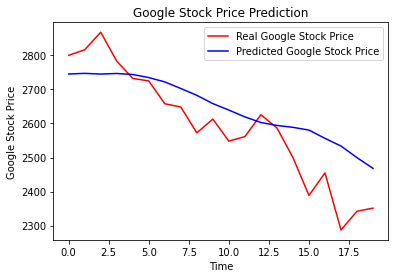

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Performance metrics

In [ ]:
from sklearn import metrics

R2 =metrics.r2_score(real_stock_price,predicted_stock_price)
MAE=metrics.mean_absolute_error(real_stock_price,predicted_stock_price)
MSE=metrics.mean_squared_error(real_stock_price,predicted_stock_price)
RMSE=np.sqrt(metrics.mean_squared_error(real_stock_price,predicted_stock_price))
MAPE=np.mean(np.abs((real_stock_price-predicted_stock_price)/real_stock_price))*100

In [ ]:
print(R2)

0.6056300695096348


In [ ]:
print(MAE)

83.02215573125002


In [ ]:
print(MSE)

10603.164981040383


In [ ]:
print(RMSE)

102.97167076939357


In [ ]:
print(MAPE)

3.3216287197759904
